## Image augmentation
Literature suggests that augmenting images can improve the performance of image classification models and reduce overfitting. 

Let's try it out on the dogbreeds data using the `imgaug` python library.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
config = tf.ConfigProto()
session = tf.Session(config=config)
from keras import backend as K
K.set_session(session)

from keras.preprocessing import image

from imgaug import augmenters as iaa

Using TensorFlow backend.


In [6]:
def read_img(source, size=None):
    img = image.load_img(source, target_size=size)
    img = image.img_to_array(img)
    return img

In [7]:
INPUT_SIZE = 224
test_img = read_img('../data/train/00a338a92e4e7bf543340dc849230e75.jpg', (INPUT_SIZE, INPUT_SIZE))
print('Test image shape: {} | dtype: {}'.format(test_img.shape, test_img.dtype))

Test image shape: (224, 224, 3) | dtype: float32


In [11]:
def augment(img):
    images = np.zeros((10, img.shape[0], img.shape[1], 3))
    images[0] = img
    
    # Randomly add noice or change color for following augmentations
    random_aug = iaa.OneOf([
        iaa.Multiply((0.9, 1.1), per_channel=1),
        iaa.AdditiveGaussianNoise(scale=(0.03*255, 0.08*255), per_channel=0.5)
    ])
    
    # Flip horizontally
    images[1] = iaa.Fliplr(1).augment_images([img])[0]
    
    # Rotate both flipped images
    images[2] = iaa.Sequential([random_aug, iaa.Affine(rotate=(13, 16), mode='edge')]).augment_images([images[0]])[0]
    images[3] = iaa.Sequential([random_aug, iaa.Affine(rotate=(-13, -16), mode='edge')]).augment_images([images[0]])[0]
    images[4] = iaa.Sequential([random_aug, iaa.Affine(rotate=(13, 16), mode='edge')]).augment_images([images[1]])[0]
    images[5] = iaa.Sequential([random_aug, iaa.Affine(rotate=(-13, -16), mode='edge')]).augment_images([images[1]])[0]
    
    # Shear both flipped images
    images[6] = iaa.Sequential([random_aug, iaa.Affine(shear=(17, 22), mode='edge')]).augment_images([images[0]])[0]
    images[7] = iaa.Sequential([random_aug, iaa.Affine(shear=(-17, -22), mode='edge')]).augment_images([images[0]])[0]
    images[8] = iaa.Sequential([random_aug, iaa.Affine(shear=(17, 22), mode='edge')]).augment_images([images[1]])[0]
    images[9] = iaa.Sequential([random_aug, iaa.Affine(shear=(-17, -22), mode='edge')]).augment_images([images[1]])[0]
    
    return images

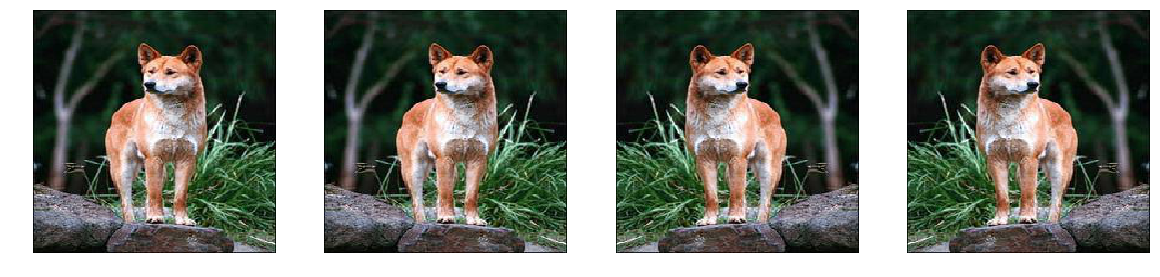

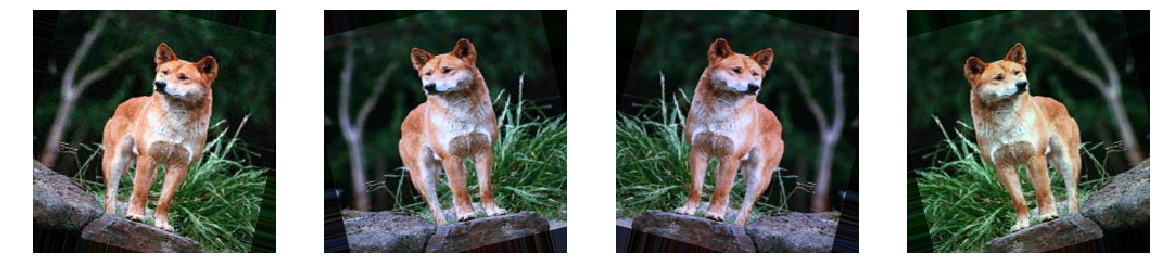

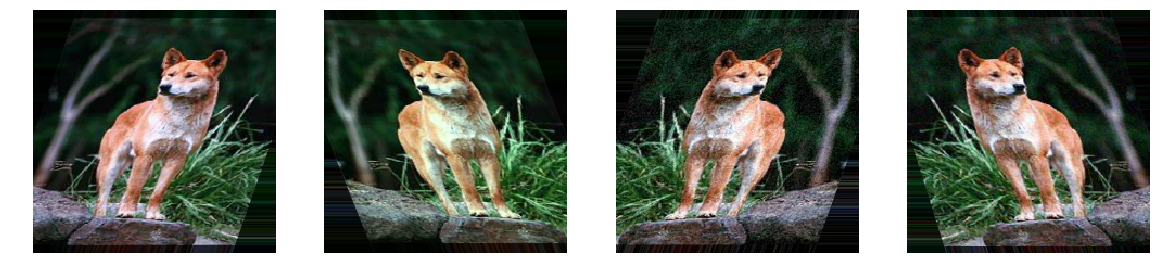

In [13]:
# Display the augmentations on the test image
images = augment(test_img)
r1 = [0, 0, 1, 1]
r2 = [2, 3, 4, 5]
r3 = [6, 7, 8, 9]

fig = plt.figure(figsize=(20, 20))
for i, img in enumerate(r1):
    fig.add_subplot(1, 4, i+1)
    plt.imshow(images[img]/255)
    plt.axis('off')
fig = plt.figure(figsize=(20, 20))
for i, img in enumerate(r2):
    fig.add_subplot(1, 4, i+1)
    plt.imshow(images[img]/255)
    plt.axis('off')
fig = plt.figure(figsize=(20, 20))
for i, img in enumerate(r3):
    fig.add_subplot(1, 4, i+1)
    plt.imshow(images[img]/255)
    plt.axis('off')

much nice! wow!